In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')

# Feture Engineering:Removing null values

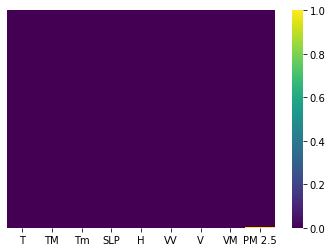

In [6]:
#Checkfor null values using heatmap
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False,cbar=True)

Interpretation:Can see a nulll value at the bottom right on PM2.5

In [7]:
#Removing null values 
df=df.dropna()

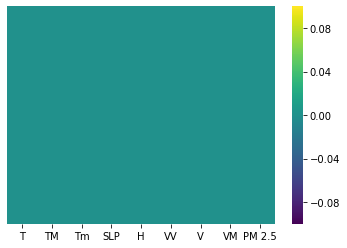

In [8]:
#Checkfor null values using heatmap after removing them
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False,cbar=True)

Interpretation:Can see that the data is clean

# Define Independent and Dependent features

In [9]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

# Train test split

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [11]:
X_train.shape

(632, 8)

In [12]:
y_train.shape

(632,)

In [13]:
X.shape

(904, 8)

In [14]:
y.shape

(904,)

In [15]:
X_test.shape

(272, 8)

In [16]:
y_test.shape

(272,)

# Random Forest:Build Model

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
rfregressor=RandomForestRegressor()

In [19]:
rfregressor.fit(X_train,y_train)

C:\Users\K T KUMAR\Anaconda33\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [23]:
print('Coeeficient of determination R^2 for train data :{}'.format(rfregressor.score(X_train,y_train)))

Coeeficient of determination R^2 for train data :0.9136844275862149


In [24]:
print('Coeeficient of determination R^2 for test data :{}'.format(rfregressor.score(X_test,y_test)))

Coeeficient of determination R^2 for test data :0.4689635503956797


Interpretation:From the above R^2 values we can clearly see that we have a overfitting issue

We have high variance between the R^2 value of train and test data.

Lets evaluate the model before solving the overfitting issue

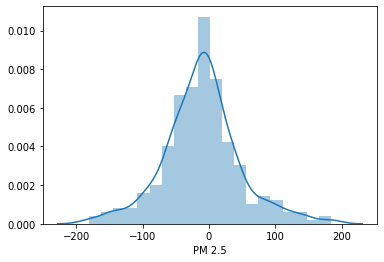

In [25]:
prediction=rfregressor.predict(X_test)

sns.distplot(y_test-prediction)

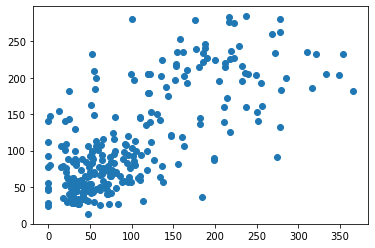

In [26]:
plt.scatter(y_test,prediction)

In [ ]:
In thedistance plot,we can see a very close normally distributed curve which indicated the model is good


# Hyperparameter tuning Random Forest Regressor

In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
RandomForestRegressor()



RandomForestRegressor(
    n_estimators='warn',
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
)

In [29]:
#Number ofTrees in Random Forest:optional (default=10)
n_estimators=[int(x) for x in np.linspace(start=100 ,stop=1200,num=12)]

#The number of features to consider when looking for the best split
max_features=['auto','sqrt']

#The maximum depth of the tree. If None, then nodes are expanded until
#all leaves are pure or until all leaves contain less than
#min_samples_split samples.(optional (default=None))

max_depth=[int(x) for x in np.linspace(5,30,num=6)]


#The minimum number of samples required to split an internal node:default=2

min_samples_split=[2,5,10,15,100]

# The minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,10]




In [31]:
randomgrid={'n_estimators':n_estimators,
           'max_features':max_features,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_split}

print(randomgrid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [2, 5, 10, 15, 100]}


In [33]:
# First create the base model to tune
rf=RandomForestRegressor()

In [34]:

# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations

search=RandomizedSearchCV(estimator=rf,param_distributions=randomgrid,n_iter=100,scoring='neg_mean_squared_error',cv=5,
    verbose=2,random_state=42,n_jobs=1)




In [35]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=15, total=   2.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=15, total=   2.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=15, total=   2.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=15, total=   2.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=15, total=   2.4s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=15 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   1.0s
[CV] n_estimators=600, min_samples_split=15

[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=100, max_features=auto, max_depth=25, total=   0.3s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=100, max_features=auto, max_depth=25 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=100, max_features=auto, max_depth=25, total=   0.3s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=100, max_features=auto, max_depth=25 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=100, max_features=auto, max_depth=25, total=   0.3s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=100, max_features=auto, max_depth=25 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=100, max_features=auto, max_depth=25, total=   0.3s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=100, max_features=auto, max_depth=25 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=100, max_features=auto, max_depth=25, total=   0.3s
[CV] n_estimators=300, mi

[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   1.6s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=15, max_features=sqrt, max_depth=25 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=15, max_features=sqrt, max_depth=25, total=   1.2s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=15, max_features=sqrt, max_depth=25 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=15, max_features=sqrt, max_depth=25, total=   1.2s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=15, max_features=sqrt, max_depth=25 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=15, max_features=sqrt, max_depth=25, total=   1.2s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=15, max_features=sqrt, max_depth=25 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=15, max_features=sqrt, max_depth=25, total=   1.2s
[CV] n_estimators=800, min_samples_split=2, 

[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=100, max_features=sqrt, max_depth=20, total=   0.2s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=100, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=100, max_features=sqrt, max_depth=20, total=   0.2s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, total=   2.8s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, total=   2.7s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, total=   2.7s
[CV] n_estimators=800, min_samples_sp

[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=100, max_features=sqrt, max_depth=20, total=   0.7s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=100, max_features=sqrt, max_depth=20 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=100, max_features=sqrt, max_depth=20, total=   0.7s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=100, max_features=sqrt, max_depth=20 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=100, max_features=sqrt, max_depth=20, total=   0.8s
[CV] n_estimators=1200, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=5, total=   2.3s
[CV] n_estimators=1200, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=5, total=   2.1s
[CV] n_estimators=1200, min_sa

[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.7s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.7s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.7s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.7s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=100, max_features=auto, max_depth=25 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=100, max_features=auto, max_depth=25, total=   1.3s
[CV] n_estimators=900, min_samples_sp

[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.4s
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.3s
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.3s
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.3s
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.3s
[CV] n_estimators=500, min_samples_split=2,

[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.6s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=15, max_features=auto, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=15, max_features=auto, max_depth=30, total=   2.4s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=15, max_features=auto, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=15, max_features=auto, max_depth=30, total=   2.4s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=15, max_features=auto, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=15, max_features=auto, max_depth=30, total=   2.4s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=15, max_features=auto, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=15, max_features=auto, max_depth=30, total=   2.5s
[CV] n_estimators=1000, min_sample

[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.7s
[CV] n_estimators=400, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.7s
[CV] n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.9s
[CV] n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.8s
[CV] n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.8s
[CV] n_estimators=900, min_samples_split=15

[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=15, max_features=auto, max_depth=10, total=   2.8s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=15, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=15, max_features=auto, max_depth=10, total=   3.1s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=15, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=15, max_features=auto, max_depth=10, total=   2.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=100, max_features=auto, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=100, max_features=auto, max_depth=15, total=   1.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=100, max_features=auto, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=100, max_features=auto, max_depth=15, total=   1.5s
[CV] n_estimators=1100, mi

[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=15, max_features=auto, max_depth=10, total=   2.7s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=15, max_features=auto, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=15, max_features=auto, max_depth=10, total=   2.6s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=15, max_features=auto, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=15, max_features=auto, max_depth=10, total=   2.6s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=15, max_features=auto, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=15, max_features=auto, max_depth=10, total=   2.6s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=100, max_features=sqrt, max_depth=15 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=100, max_features=sqrt, max_depth=15, total=   0.2s
[CV] n_estimators=200, min_sampl

[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   0.2s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=15, max_features=sqrt, max_depth=20 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=15, max_features=sqrt, max_depth=20, total=   0.9s
[CV] n_estimators=700, min_samples_split=100, 

[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=100, max_features=sqrt, max_depth=30, total=   0.7s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=100, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=100, max_features=sqrt, max_depth=30, total=   0.7s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=100, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=100, max_features=sqrt, max_depth=30, total=   0.7s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=100, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=100, max_features=sqrt, max_depth=30, total=   0.7s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=100, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=100, max_features=sqrt, max_depth=30, total=   0.7s
[CV] n_estimators=300, mi

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 11.1min finished
C:\Users\K T KUMAR\Anaconda33\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [36]:
search.best_params_

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 25}

In [37]:
search.best_score_

-2794.5137821400776

In [38]:
print('Random Forest regression score:{}'.format(search.best_score_))

Random Forest regression score:-2794.5137821400776


Interpretation:

Compare to the previous models the Random Forest score is much closer to zero indicating less error:
Random Forest regression score:-2794.5137821400776
Decision Tree regression score:-3468.135532063188       
Lasso regression score:-3493.719817078534
Ridge regression score:-3501.974141971
Linear regression score:-3576.1976560478724

# Model Evaluation after Hyper parameteroptimizing

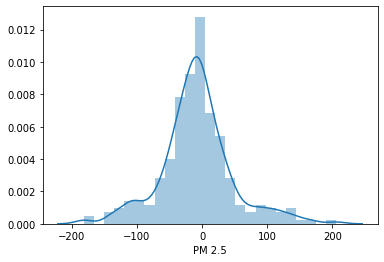

In [39]:
prediction=search.predict(X_test)
sns.distplot(y_test-prediction)

# Interpretation:

This is very close to a bell curve indicating normal distribution.

The model we have does not have the overfitting problem due to hyperparameter optimization.

Hence the prediction works fine for the test data

# Regression evaluation Metrics:

In [40]:
from sklearn import metrics

In [41]:
print('MAE:',metrics.mean_absolute_error(y_test,prediction))
print('MSE:',metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 40.31671308602534
MSE: 3207.122697719825
RMSE: 56.63146384934637


# Save the Model

In [42]:
import pickle

In [43]:
file=open('randomforest_regressor.pkl','wb')
pickle.dump(search,file)